<a href="https://colab.research.google.com/github/koto253/DATA_611/blob/main/Module08_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework Week 08

1. Explain the coefficient of determination ($R^2$).
2. The mpg dadaset contains the target mpg, and the following features:
  - cylinders
  - displacement
  - acceleration
  - model: the model year
  - origin: where the vehicles were manufactured
  
Plot the scatter plot matrix and correlation matrix, pick two feature variables and perform linear regression to predict `mpg`.

```python
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/mpg.csv')
```

3. Using the picked predictor variables, split the data (20% test, 80% training), predict the mpg by linear regression, print the $R^2$ and MSE in both the training and test set, plot the residual. What does the residual plot tell you?

1. Explain the coefficient of determination (R2).
The coefficient of determination (R²) is a way to see how well a line fits some data. It's a number between 0 and 1. If it's 0, the line doesn't fit the data at all. If it's 1, the line fits perfectly. R² tells us how much of the data is explained by the line. For example, if R² is 0.8, it means that 80% of the data can be explained by the line. But R² doesn't tell us why things happen, and we need to consider other things when looking at the line.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/mpg.csv').dropna()
df.head()

2. The mpg dadaset contains the target mpg, and the following features:
        cylinders
        displacement
        acceleration
        model: the model year
        origin: where the vehicles were manufactured
        Plot the scatter plot matrix and correlation matrix, pick two feature variables and perform linear regression to predict mpg.



In [ ]:
sns.pairplot(df, height= 2.5)
plt.tight_layout()
plt.show()

In [22]:
X = df[['displacement', 'acceleration']]
y = df['mpg']

In [23]:
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
y_hat = model.predict(X)

mean_squared_error(y, y_hat)

In [ ]:
r2_score(y, y_hat)


  3. Using the picked predictor variables, split the data (20% test, 80% training), predict the mpg by linear regression, print the R2 and MSE in both the training and test set, plot the residual.
  What does the residual plot tell you?


In [30]:
from sklearn.preprocessing import PolynomialFeatures

# split the data (20% test, 80% training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)



In [56]:
# output R2 and MSE in both the training and test set
print("train MSE ", mean_squared_error(y_train, y_hat_train))
print('train "R * R" ', r2_score(y_train, y_hat_train))
print("test MSE ", mean_squared_error(y_test, y_hat_test))
print('test "R * R" ', r2_score(y_test, y_hat_test))

train MSE  17.158608184046834
train "R * R"  0.7106840800715839
test MSE  25.86533799842694
test "R * R"  0.6003631217400711


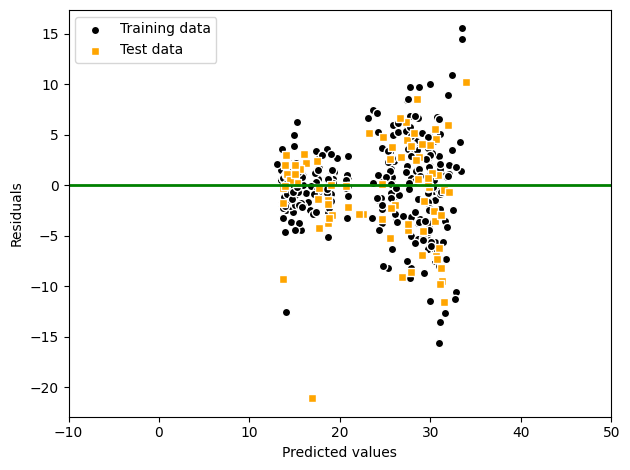

In [53]:

plt.scatter(y_hat_train,  y_hat_train - y_train,
            c='black', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_hat_test,  y_hat_test - y_test,
            c='orange', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='green', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()